### 02.머신러닝 데이터는 왜 나누나요?

mlxtend란?
* sklearn에 없는 몇몇 유용한 기능을 가지고 있다.
* pip install mlxtend

In [3]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

In [4]:
from mlxtend.plotting import plot_decision_regions
from matplotlib.pyplot import plt

plt.figure(figsize=(14,8))
plot_decision_regions(X = iris.data[: , 2:], y = iris.target, clf = iris_tree, legend = 2)
plt.show()

ImportError: cannot import name 'plt' from 'matplotlib.pyplot' (/home/addinedu/venv/opencv/lib/python3.10/site-packages/matplotlib/pyplot.py)

In [ ]:
from sklearn.metircs import accuracy_score

y_pred_tr = iris_tree.predict(iris.data[:, 2:])
accuracy_score(iris.target, y_pred_tr)

accuracy가 높다고 해서 믿을 수 있는 건 아니다.

훈련 데이터와 테스트 데이터를 나눠야 과적합 발생 확률이 적고, \
따라서 새롭게 다시 시작 ! 

In [5]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

In [6]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
from sklearn.model_selection import train_test_split

# 행을 다 쓸건데 열은 sepal만 !
features = iris.data[:, 2:]
labels = iris.target

X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                    test_size=0.2,
                                                    random_state=13)

여기서 random_state란? \
랜덤 함수 중에서도 어느 정도의 규칙성에 따른 랜덤값을 주는 것 \
왜? 매일 다른 경계값을 주면 안되니까

In [8]:
import numpy as np

np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([ 9,  8, 13]))

이렇게 보니 동일 비율이 아니다.

In [9]:
from sklearn.model_selection import train_test_split

features = iris.data[:, 2:]
labels = iris.target

X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                    test_size=0.2,
                                                    stratify=labels,
                                                    random_state=13)

np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([10, 10, 10]))

stratify를 이용해 동일 비율로 맞추기

In [10]:
from sklearn.tree import DecisionTreeClassifier

iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
# 훈련 세트만 따로 훈련시켜야 함
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [11]:
from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(X_train)
accuracy_score(y_train, y_pred_tr)

0.95

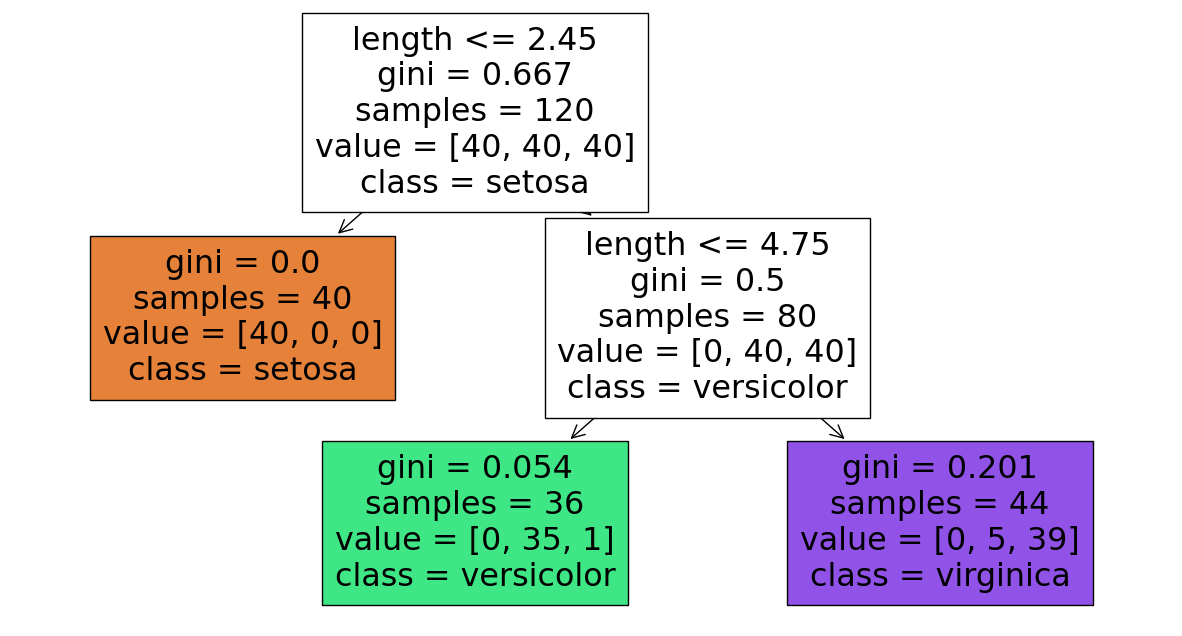

In [12]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15, 8))
# '_' -> 이 다음에 안써도 되는 변수
# return 반환값을 받을 때
_ = tree.plot_tree(iris_tree,
                   feature_names = ['length', 'width'],
                   class_names=list(iris.target_names),
                   filled=True)

훈련데이터에 대한 결정경계를 확인하자

### 훈련용 데이터에 대한 결정경계

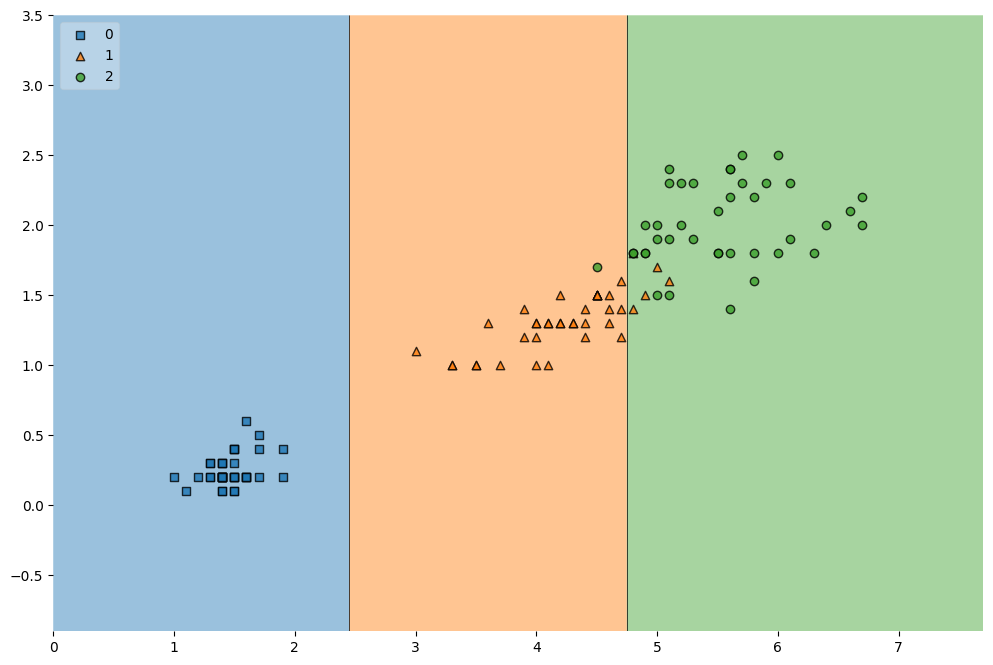

In [13]:
plt.figure(figsize=(12,8))
plot_decision_regions(X=X_train, y=y_train, clf=iris_tree, legend=2)
plt.show()

In [14]:
y_pred_tr = iris_tree.predict(X_test)
accuracy_score(y_test, y_pred_tr)

0.9666666666666667

-> 테스트 데이터에 대한 accuracy

### 테스트 데이터에 대한 결정경계

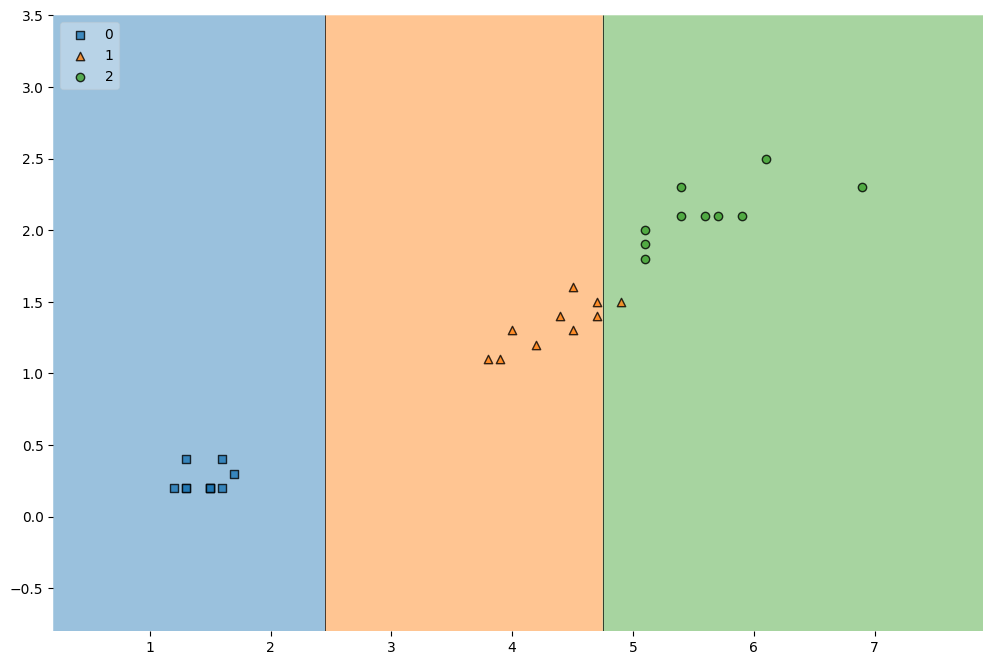

In [15]:
plt.figure(figsize=(12,8))
plot_decision_regions(X=X_test, y=y_test, clf=iris_tree, legend=2)
plt.show()

### 모델 사용하기 !
그 전에, feature가 2개였기 때문에
4개인 모델을 만들어보자

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 행을 다 쓸건데 열은 sepal만 !
features = iris.data
labels = iris.target

X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                    test_size=0.3,
                                                    random_state=2)


iris_tree = DecisionTreeClassifier(max_depth=3, random_state=13)
# 훈련 세트만 따로 훈련시켜야 함
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=13)

In [52]:
from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(X_train)
accuracy_score(y_train, y_pred_tr)

0.9809523809523809

### 전체 특성을 사용한 결정나무 모델

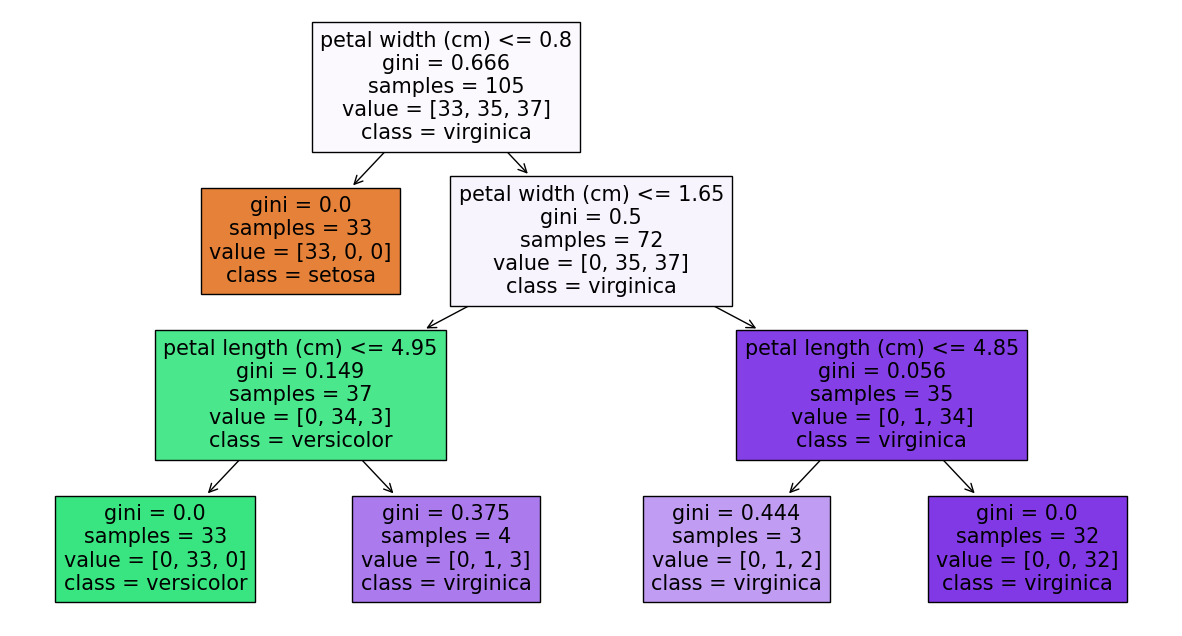

In [53]:
fig = plt.figure(figsize=(15, 8))
_ = tree.plot_tree(iris_tree,
                   feature_names = list(iris.feature_names),
                   class_names = list(iris.target_names),
                   filled = True)

### 모델 사용해보기
### 예측하자 !

In [54]:
test_data = [[4.3, 2. , 1.2, 1.0]]
iris_tree.predict_proba(test_data)

array([[0., 1., 0.]])

In [55]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

정답을 확률로 알아보기 !

In [56]:
test_data = [[4.3, 2. , 1.2, 1.0]]
iris_tree.predict_proba(test_data)

array([[0., 1., 0.]])

정답 표시 !

predict_proba -> 확률 반환 \
predict -> 인덱스 반환 \
그렇다면 predict 인덱스를 target_names에 넣으면 될듯!

In [57]:
test_data = [[4.3, 2. , 1.2, 1.0]]
iris.target_names[iris_tree.predict(test_data)]

array(['versicolor'], dtype='<U10')

어떤 데이터가 가장 영향을 크게 줄까?

In [58]:
iris_tree.feature_importances_

array([0.       , 0.       , 0.0689075, 0.9310925])

In [59]:
iris_clf_model = dict(zip(iris.feature_names, iris_tree.feature_importances_))
iris_clf_model

{'sepal length (cm)': 0.0,
 'sepal width (cm)': 0.0,
 'petal length (cm)': 0.06890750499239391,
 'petal width (cm)': 0.931092495007606}